# Assignment 16: K-Nearest Neighbours (KNN) Classification

## Dataset: Zoo Animal Classification

**Objective:** Classify animals into types based on their features.

**Topics Covered:**
- KNN Algorithm
- Distance Metrics
- Choosing K value
- Model Evaluation

---
## Step 1: Import Libraries and Load Data

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('datasets/Zoo.csv')

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (101, 18)

First 5 rows:


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,deer,0,0,1,1,0,1,0,1,0,0,0,0,8,0,1,1,1
1,duck,0,0,0,1,0,1,0,1,1,1,1,1,2,1,0,1,5
2,hawk,0,0,0,1,0,1,1,0,1,1,1,1,0,1,0,0,5
3,clam,0,1,0,1,0,1,0,0,0,1,0,1,6,1,1,0,2
4,duck,1,1,1,1,1,1,0,1,1,0,0,0,8,0,0,1,5


---
## Step 2: Data Analysis and Visualization

In [3]:
# Check data info
print("=== Dataset Info ===")
print(df.dtypes)
print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Dataset Info ===
animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

=== Missing Values ===
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


=== Animal Type Distribution ===
type
1    20
2     7
3     7
4     9
5    27
6    12
7    19
Name: count, dtype: int64


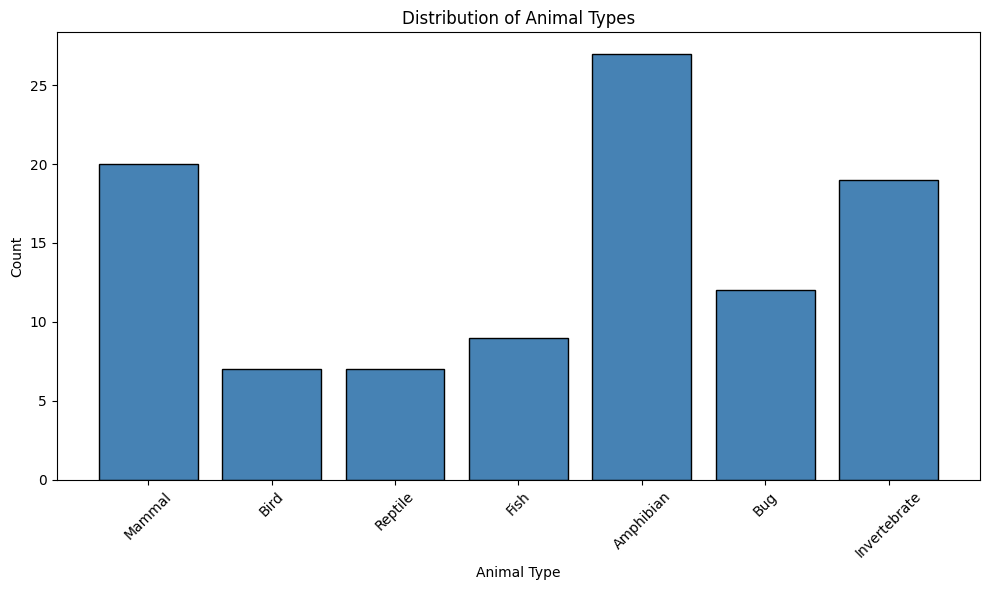

In [4]:
# Target variable distribution (animal type)
print("=== Animal Type Distribution ===")
type_counts = df['type'].value_counts().sort_index()
print(type_counts)

# Animal types: 1=Mammal, 2=Bird, 3=Reptile, 4=Fish, 5=Amphibian, 6=Bug, 7=Invertebrate
type_names = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

plt.figure(figsize=(10, 6))
plt.bar(type_names, type_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.title('Distribution of Animal Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Feature analysis - check binary features
feature_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 
                'predator', 'toothed', 'backbone', 'breathes', 'venomous', 
                'fins', 'legs', 'tail', 'domestic', 'catsize']

print("=== Feature Summary ===")
for col in feature_cols:
    unique_vals = df[col].unique()
    print(col + ":", sorted(unique_vals))

=== Feature Summary ===
hair: [np.int64(0), np.int64(1)]
feathers: [np.int64(0), np.int64(1)]
eggs: [np.int64(0), np.int64(1)]
milk: [np.int64(0), np.int64(1)]
airborne: [np.int64(0), np.int64(1)]
aquatic: [np.int64(0), np.int64(1)]
predator: [np.int64(0), np.int64(1)]
toothed: [np.int64(0), np.int64(1)]
backbone: [np.int64(0), np.int64(1)]
breathes: [np.int64(0), np.int64(1)]
venomous: [np.int64(0), np.int64(1)]
fins: [np.int64(0), np.int64(1)]
legs: [np.int64(0), np.int64(2), np.int64(4), np.int64(6), np.int64(8)]
tail: [np.int64(0), np.int64(1)]
domestic: [np.int64(0), np.int64(1)]
catsize: [np.int64(0), np.int64(1)]


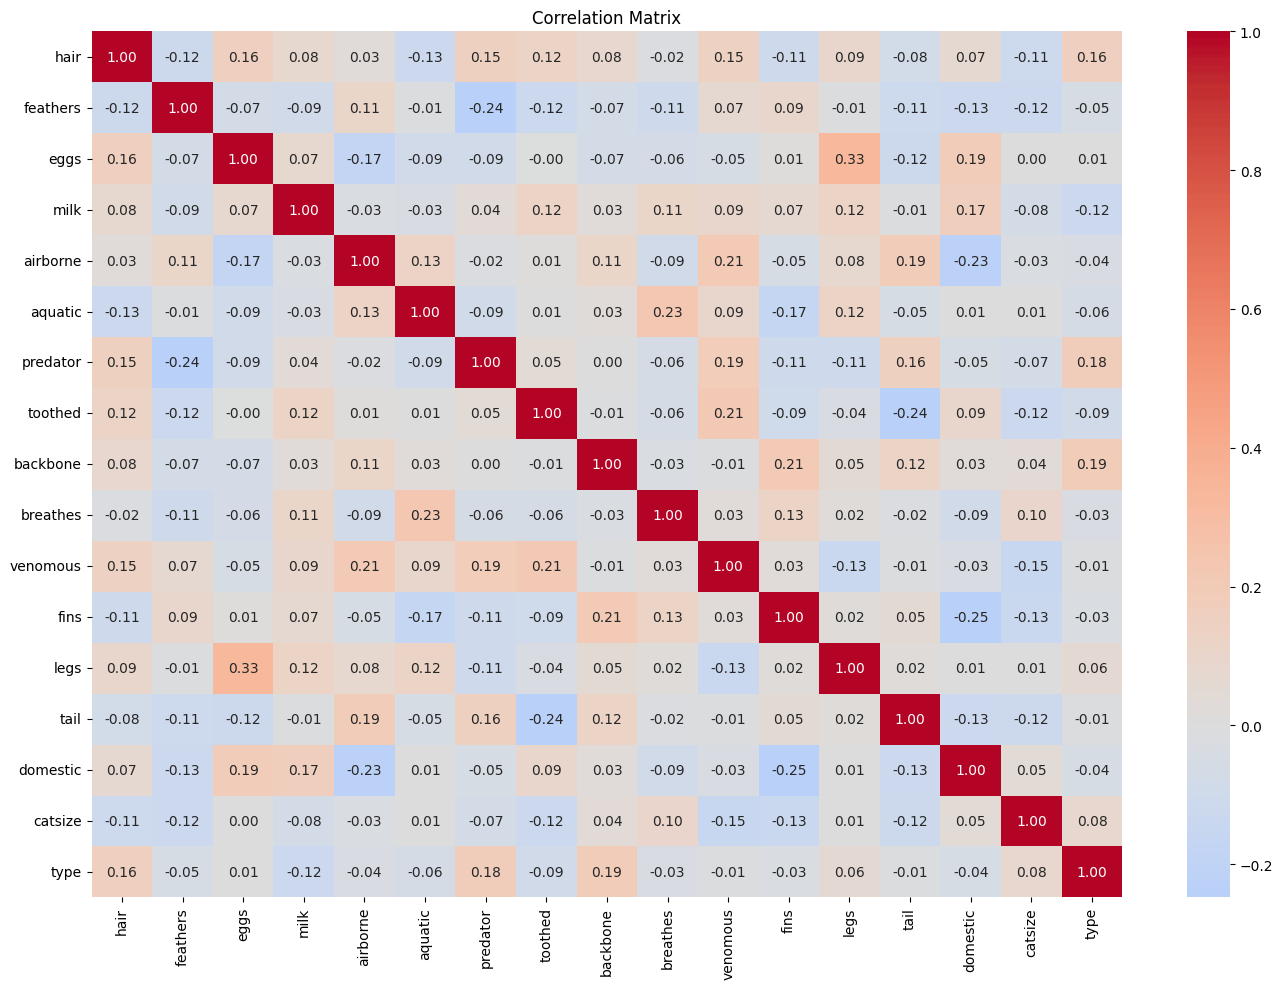

In [6]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation = df[feature_cols + ['type']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

=== Legs Distribution ===
legs
0    20
2    20
4    20
6    21
8    20
Name: count, dtype: int64


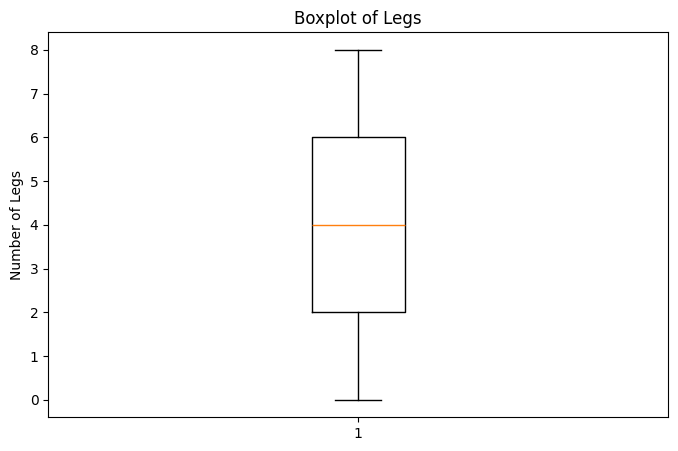

In [7]:
# Check for outliers in 'legs' column (only non-binary feature)
print("=== Legs Distribution ===")
print(df['legs'].value_counts().sort_index())

plt.figure(figsize=(8, 5))
plt.boxplot(df['legs'])
plt.title('Boxplot of Legs')
plt.ylabel('Number of Legs')
plt.show()

---
## Step 3: Data Preprocessing

In [8]:
# Prepare features and target
print("=== Preparing Data ===")

# Features (X) - all columns except 'animal name' and 'type'
X = df[feature_cols]

# Target (y)
y = df['type']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

=== Preparing Data ===
Features shape: (101, 16)
Target shape: (101,)


In [9]:
# Scale features (important for KNN since it uses distance)
print("=== Feature Scaling ===")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before scaling:")
print("  Mean:", round(X['legs'].mean(), 2))
print("  Std:", round(X['legs'].std(), 2))

print("\nAfter scaling:")
print("  Mean:", round(X_scaled[:, feature_cols.index('legs')].mean(), 2))
print("  Std:", round(X_scaled[:, feature_cols.index('legs')].std(), 2))

=== Feature Scaling ===
Before scaling:
  Mean: 4.02
  Std: 2.84

After scaling:
  Mean: -0.0
  Std: 1.0


In [10]:
# Split data into training and testing sets (80-20)
print("=== Train-Test Split ===")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

=== Train-Test Split ===
Training set size: 80
Testing set size: 21


---
## Step 4: KNN Implementation and K Selection

In [11]:
# Find optimal K value
print("=== Finding Optimal K Value ===")

k_values = range(1, 21)
accuracies = []

for k in k_values:
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train
    knn.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print("K =", k, "| Accuracy:", round(acc, 4))

# Find best K
best_k = k_values[accuracies.index(max(accuracies))]
print("\nBest K:", best_k, "with accuracy:", round(max(accuracies), 4))

=== Finding Optimal K Value ===
K = 1 | Accuracy: 0.0
K = 2 | Accuracy: 0.0476
K = 3 | Accuracy: 0.0476
K = 4 | Accuracy: 0.0
K = 5 | Accuracy: 0.0476
K = 6 | Accuracy: 0.1429
K = 7 | Accuracy: 0.1429
K = 8 | Accuracy: 0.0476
K = 9 | Accuracy: 0.0476
K = 10 | Accuracy: 0.0952
K = 11 | Accuracy: 0.0952
K = 12 | Accuracy: 0.1429
K = 13 | Accuracy: 0.0952
K = 14 | Accuracy: 0.0476
K = 15 | Accuracy: 0.0476
K = 16 | Accuracy: 0.0952
K = 17 | Accuracy: 0.0952
K = 18 | Accuracy: 0.1429
K = 19 | Accuracy: 0.0952
K = 20 | Accuracy: 0.1429

Best K: 6 with accuracy: 0.1429


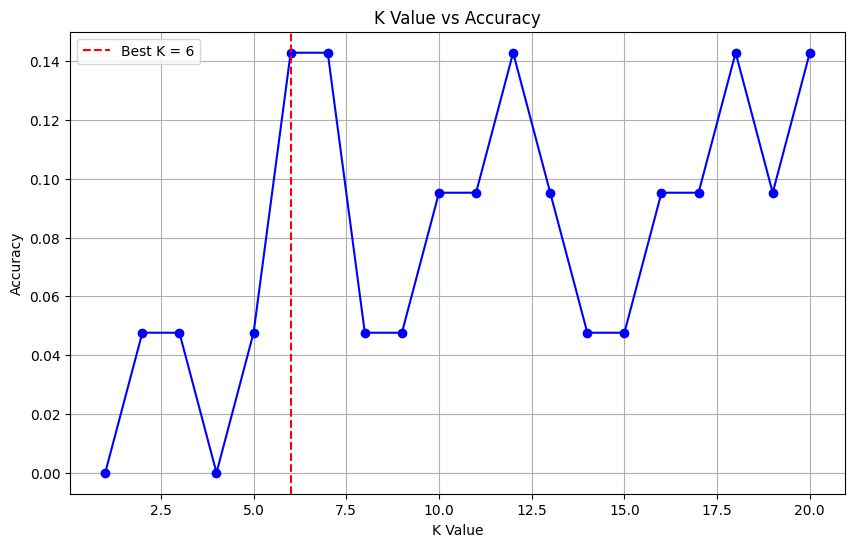

In [12]:
# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.axvline(x=best_k, color='red', linestyle='--', label='Best K = ' + str(best_k))
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Compare different distance metrics
print("=== Comparing Distance Metrics ===")

metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(metric.capitalize() + ":", round(acc, 4))

=== Comparing Distance Metrics ===
Euclidean: 0.1429
Manhattan: 0.1429
Minkowski: 0.1429


---
## Step 5: Train Final Model and Evaluate

In [14]:
# Train final model with best K
print("=== Training Final Model ===")

final_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
final_knn.fit(X_train, y_train)

# Make predictions
y_pred = final_knn.predict(X_test)

print("Model trained with K =", best_k)

=== Training Final Model ===
Model trained with K = 6


In [15]:
# Evaluate model
print("=== Model Evaluation ===")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))

=== Model Evaluation ===
Accuracy: 0.1429
Precision: 0.4857
Recall: 0.1429
F1-Score: 0.1706


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


=== Confusion Matrix ===


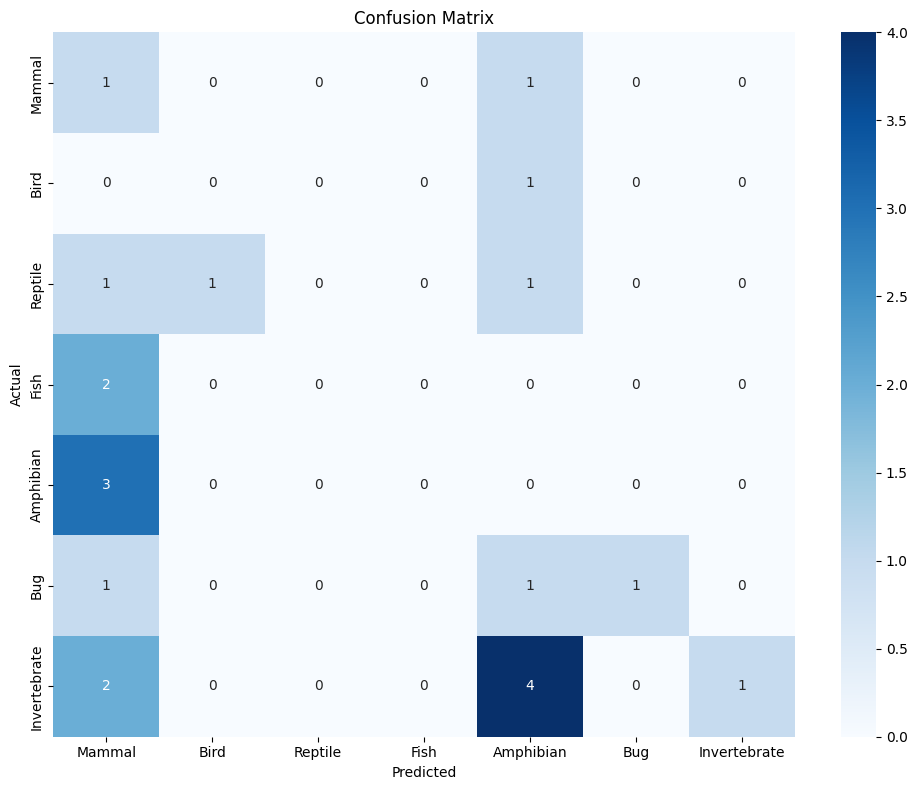

In [16]:
# Confusion Matrix
print("=== Confusion Matrix ===")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=type_names, yticklabels=type_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [17]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=type_names))

=== Classification Report ===
              precision    recall  f1-score   support

      Mammal       0.10      0.50      0.17         2
        Bird       0.00      0.00      0.00         1
     Reptile       0.00      0.00      0.00         3
        Fish       0.00      0.00      0.00         2
   Amphibian       0.00      0.00      0.00         3
         Bug       1.00      0.33      0.50         3
Invertebrate       1.00      0.14      0.25         7

    accuracy                           0.14        21
   macro avg       0.30      0.14      0.13        21
weighted avg       0.49      0.14      0.17        21



c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

---
## Step 6: Decision Boundary Visualization

In [18]:
# For visualization, use only 2 features (simplification)
print("=== Decision Boundary (2D Visualization) ===")

# Select 2 most important features for visualization
X_2d = X[['milk', 'feathers']].values

# Scale
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d_scaled, y, test_size=0.2, random_state=42
)

# Train KNN with 2D data
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

=== Decision Boundary (2D Visualization) ===


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",6
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


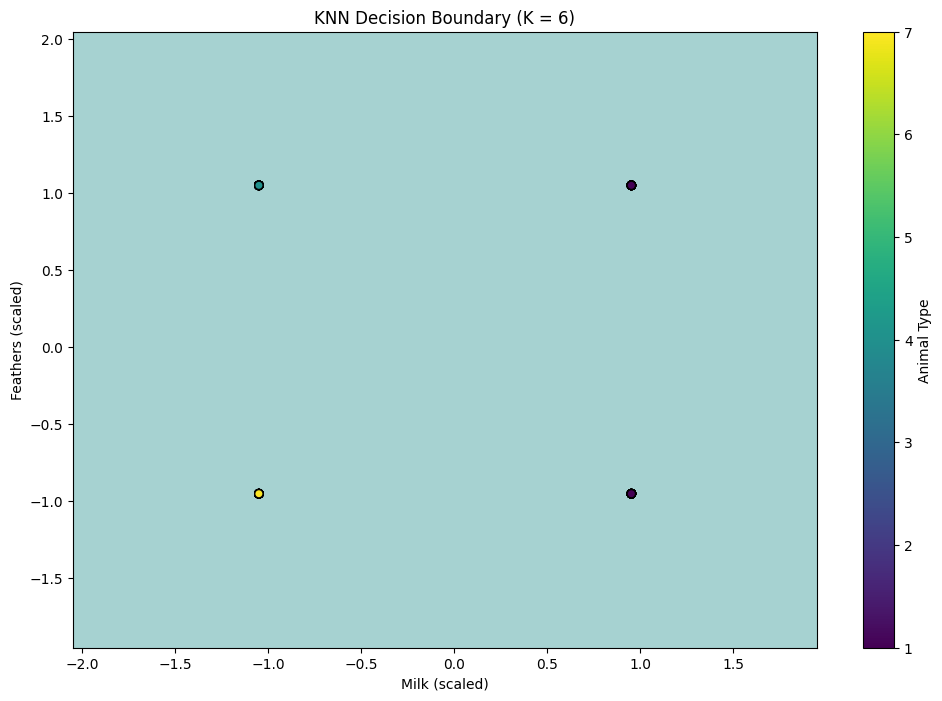

In [19]:
# Create meshgrid for decision boundary
x_min = X_2d_scaled[:, 0].min() - 1
x_max = X_2d_scaled[:, 0].max() + 1
y_min = X_2d_scaled[:, 1].min() - 1
y_max = X_2d_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y, cmap='viridis', edgecolors='black')
plt.xlabel('Milk (scaled)')
plt.ylabel('Feathers (scaled)')
plt.title('KNN Decision Boundary (K = ' + str(best_k) + ')')
plt.colorbar(label='Animal Type')
plt.show()

---
## Interview Questions

### 1. Key Hyperparameters in KNN

| Hyperparameter | Description |
|----------------|-------------|
| **n_neighbors (K)** | Number of neighbors to consider. Smaller K = more complex, larger K = smoother boundary |
| **weights** | 'uniform' (all equal) or 'distance' (closer neighbors have more weight) |
| **metric** | Distance metric to use (euclidean, manhattan, etc.) |
| **p** | Power parameter for Minkowski metric (p=1 is Manhattan, p=2 is Euclidean) |
| **algorithm** | Algorithm to compute nearest neighbors (ball_tree, kd_tree, brute) |

### 2. Distance Metrics in KNN

| Metric | Formula | Use Case |
|--------|---------|----------|
| **Euclidean** | sqrt(sum((x1-x2)^2)) | Most common, good for continuous data |
| **Manhattan** | sum(abs(x1-x2)) | Good when features are on different scales |
| **Minkowski** | (sum(abs(x1-x2)^p))^(1/p) | Generalization of Euclidean and Manhattan |
| **Hamming** | Count of different bits | Good for binary/categorical data |
| **Cosine** | 1 - cos(angle) | Good for text/document similarity |

---
## Summary

In this assignment, we:

1. **Loaded and analyzed** the Zoo dataset
2. **Preprocessed data** by scaling features
3. **Found optimal K** by testing values from 1 to 20
4. **Compared distance metrics** (Euclidean, Manhattan, Minkowski)
5. **Evaluated the model** using accuracy, precision, recall, F1-score
6. **Visualized decision boundaries** using 2D projection